###### RL HW3
###### Ghanendra MT19213

# MC

###### Question 1. Rewrite the psuedo code of Monte Carlo ES as mentioned in Exercise 5:4. You must explain your code and why it is equivalent to the code provided in the book.

###### Using Incremental update rule
 ###### NewEstimate <-- OldEstimate + StepSize * [ Target − OldEstimate]
* We have from 2.4 
* Q(n+1) = Qn + 1/n * (Rn  - Qn)
* We can apply to update the Q(St,At) for Monte Carlo ES, so that we don't require to keey an emply list for Returns(s,a) and directly update for state action value pair with stepsize increasing for each time step in an episode.

* Qn(St,At) = 1/n * Σ[i=1:n] Gi(St,At), where 1/n = alpha
* => Qn+1(St,At) = Qn(St,At) + (1/n) * (Gn(St,At) - Qn(St,At))

###### Question 2. Draw the backup diagram asked for in exercise 5:3.

Starting from the root node, pick the action which maximizes the Q following pollicy pi.
O ---> ◘ -->  * * * --> O max(Qπ(St,At))

###### Question 3. Solve exercise 5:6.

What is the equation analogous to (5.6) for action values Q(s, a) instead of
state values V (s), again given returns generated using b?

* Q(s,a) = Σ[t∈J(s,a)] ρt+1:T(t)-1*Gt / Σt∈J(s,a)ρt+1:T(t)-1

###### Question 4. Solve the blackjack game and generate figures 5:1, 5:2, and 5:3. Submit your figures and code. You must explain your code.

###### Blackjack problem

* R = [+1: 'winning', -1: 'losing', 0:'drawing'] Rewards
* Y = 1  Discounting factor
* A = ['hit', 'stick'] Actions
* Players decision depends on
* 1. Current sum (12 - 21)
* 2. Dealer's 1 showing card (ace - 10)
* 3. Player has usable ace or not
* 200 Total States and each depends on 3 above factors
* S = ['Usable_ace','Sum','Dealer']
* Policy is Stick (if sum(players card)~ 20 or 21) else Hits


In [4]:
import numpy as np
import matplotlib.pyplot as plt

ns = 200 # No. of states
State = dict.fromkeys(np.arange(200),0)
state_index = list(State.keys())
state_value = list(State.values())
Value = dict.fromkeys(np.arange(200),0)
G = dict.fromkeys(np.arange(200),0)
A = ['stick','hit'] # Actions
C = [1,2,3,4,5,6,7,8,9,10,10,10,10]

state_ep = []
DCard = [] # Dealer's card
PCard = [] # Player's card
ptsum = []
dtsum = []

# Sample episodes
print('5 Sample episodes are generated')
neps = 5
for episode in range(neps):

    print('\nEpisode %d: '%(episode+1)) #####
    #Only 1 card of dealer is visible
    DCard = np.random.choice(C,replace = False,size = 2)
    #2 Cards selected by player
    PCard = np.random.choice(C,replace = False,size = 2)
    print('Dealer cards: ',DCard)
    print('Player cards: ',PCard)
    #Parameter to keep track of Ace
    ptace = []
    dtace = []
    dlastCard = DCard[0]
    usable_ace = 0
    #Flag for selecting card
    Select_second_card = 'True'
    
    #Usable ace exists or not
    #Is dealer's card is Ace
    if DCard[0] == 1:
        dtace.append(1)
        if(np.sum(DCard)==11):
            DCard[0] = 11
        else:
            #Dealers selected ace value
            ace = int(np.random.choice([11,1]))
            DCard[0] = ace
    else:
        dtace.append(0)
    #Is ace in Players card
    if 1 in PCard:
        ptace.append(1)
        #Natural case (Ace and a 10)
        if(np.sum(PCard)==11):
            usable_ace = 1
            if(PCard[0]==1):
                PCard[0] = 11
            else:
                PCard[1] = 11
        else:
            #Player's choice of Ace
            ace = int(np.random.choice([1,11]))
            if(PCard[0]==1):
                PCard[0] = ace
            else:
                PCard[1] = ace
    else:
        ptace.append(0)    
        
    p_sum = np.sum(PCard)
    d_sum = np.sum(DCard[0])
    
    print('p-sum:',p_sum)
    print('d-sum:',d_sum)
    #Run till end of episode
    t = 0
    R = []
    r = 0
    #turn = 'player'
    while(1):
        ptsum.append(p_sum)
        dtsum.append(d_sum)
        
        # Immediately Check dealers card if its natural
        #Player sticks
        if(p_sum==21 and d_sum<12):
            # 2nd card of Dealer
            card = int(DCard[1])
            #print('Dealer\'s card:',card)
            if(card ==1):
                dtace.append(1)
                #Dealer has a natural
                if(np.sum(DCard)==11):
                    card = 11
                else:
                    ace = int(np.random.choice([11,1]))
                    card = ace
            else:
                dtace.append(0)
            d_sum+=card
            ptace.append(0)
            #dtsum.append(d_sum)
            print('Dealer sum:',d_sum)
            if(d_sum<21):
                print('Immediate Dealer busted') #####
                R.append(1)
                r = 1
                break
            elif(d_sum==21):
                print('Immediate Game Draw')    #####
                R.append(0)
                r = 0
                break
        
        #Players turn
        #Player hits or sticks
        else:
            #Players choice(hit or stick)
            a = np.random.choice(A,1)
            
            #Player hits
            if(a=='hit'):
                card = int(np.random.choice(C,1))
                #Update players sum of cards
                # If card is ace
                if(card ==1):
                    ptace.append(1)
                    ace = int(np.random.choice([11,1]))
                    card = ace 
                else:
                    ptace.append(0)
                print('Players card:',card)
                p_sum+=card
                #ptsum.append(p_sum)
                print('Players sum:',p_sum)
                if(p_sum>21):
                    print('Player busted') #####
                    R.append(-1)
                    r = -1
                    break
            #Player sticks 
            #Dealer's turn
            else:
                #Dealer hits or sticks by fixed strategy
                # Dealer hits
                while(d_sum<17):
                    #Dealer shows 2nd card
                    if(Select_second_card == 'True'):
                        Select_second_card = 'False'
                        card = DCard[1]
                    else:
                        card = int(np.random.choice(C,1))
                    if(card ==1):
                        dtace.append(1)
                        #If Dealer's natural ace = 11
                        if(np.sum(DCard)==11):
                            card = 11
                        else:
                            ace = int(np.random.choice([11,1]))
                            card = ace 
                    else:
                        dtace.append(0)
                    d_sum+=card
                    print('Dealers card:',card)
                    print('Dealers sum:',d_sum)
                    dlastCard = DCard[1]
                if(d_sum>21):
                    print('Dealer busted') #####
                    R.append(1)
                    r = 1
                    break 
                # Who's Sum is closer to 21
                elif(21-p_sum < 21-d_sum):
                    print('Player wins') #####
                    R.append(1)
                    r = 1
                    break
                elif(21-p_sum > 21-d_sum):
                    print('Player busted') #####
                    R.append(-1)
                    r = -1
                    break
                elif(21-p_sum == 21-d_sum):
                    print('Game draw') #####
                    R.append(0)
                    r = 0
                    break
                    
        t+=1
    T = t+1
    #print('Time:',T) #####
    #print('Rewards:',R)
    print('r:',r)
    #print('Reward: ',R[episode]) #####
    #Episode is over
    #Monte Carlo update by backtracking in time t
    while(T>0):
        # Update State values
        state_value = list(State.values())
        #Episodic state
        eps = [ptace[T-1],ptsum[T-1],dlastCard]
        Rt = r
        if( eps not in state_value):
            ep_state = int(np.random.choice(state_index))
            #print('EP_s:',ep_state)
            state_ep.append(ep_state)
            State[ep_state] = eps
            G[ep_state] = [Rt]
            #print(G[ep_state])
            Value[ep_state] = Rt
            state_index.remove(ep_state)

        else:
            #print('Same state selected')
            idx = state_value.index(eps)
            #print('Idx:',idx)
            G[idx].append(Rt)
            #print(G[idx])
            Value[idx] = np.average(G[idx])
            #print('Updated Value %d:'%idx,Value[idx])
            
        #print('S(%d)'%(T-1),eps)
        T-=1
        
#vs = list(Value.values())
#plt.plot(vs)

5 Sample episodes are generated

Episode 1: 
Dealer cards:  [3 2]
Player cards:  [6 8]
p-sum: 14
d-sum: 3
Dealers card: 2
Dealers sum: 5
Dealers card: 9
Dealers sum: 14
Dealers card: 10
Dealers sum: 24
Dealer busted
r: 1

Episode 2: 
Dealer cards:  [ 9 10]
Player cards:  [ 6 10]
p-sum: 16
d-sum: 9
Players card: 6
Players sum: 22
Player busted
r: -1

Episode 3: 
Dealer cards:  [5 3]
Player cards:  [8 4]
p-sum: 12
d-sum: 5
Dealers card: 3
Dealers sum: 8
Dealers card: 10
Dealers sum: 18
Player busted
r: -1

Episode 4: 
Dealer cards:  [10  2]
Player cards:  [2 1]
p-sum: 13
d-sum: 10
Dealers card: 2
Dealers sum: 12
Dealers card: 2
Dealers sum: 14
Dealers card: 1
Dealers sum: 15
Dealers card: 2
Dealers sum: 17
Player busted
r: -1

Episode 5: 
Dealer cards:  [3 6]
Player cards:  [10  4]
p-sum: 14
d-sum: 3
Players card: 8
Players sum: 22
Player busted
r: -1


###### MC Blackjack Function, same above code used as a function with applied policy. Considering the policy that player sticks if the player’s sum is 20 or 21, and otherwise hits.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

ns = 200 # No. of states
State = dict.fromkeys(np.arange(200),0)
state_index = list(State.keys())
state_value = list(State.values())
Value = dict.fromkeys(np.arange(200),0)
G = dict.fromkeys(np.arange(200),0)
A = ['stick','hit'] # Actions
C = [1,2,3,4,5,6,7,8,9,10]

state_ep = []
DCard = [] # Dealer's card
PCard = [] # Player's card
ptsum = []
dtsum = []

# No. of episodes 500,000
#neps = 1000
#for episode in range(neps):

def mc_blackjack():
    
    #print('\nEpisode %d: '%(episode+1)) #####
    #Only 1 card of dealer is visible
    DCard = np.random.choice(C,replace = False,size = 2)
    #2 Cards selected by player
    PCard = np.random.choice(C,replace = False,size = 2)
    #print('Dealer cards: ',DCard)
    #print('Player cards: ',PCard)
    #Parameter to keep track of Ace
    ptace = []
    dtace = []
    usable_ace = 0
    dlastCard = DCard[0]
    #Flag for selecting card
    Select_second_card = 'True'
    
    #Usable ace exists or not
    #Is dealer's card is Ace
    if DCard[0] == 1:
        dtace.append(1)
        if(np.sum(DCard)==11):
            DCard[0] = 11
        else:
            #Dealers selected ace value
            ace = int(np.random.choice([11,1]))
            DCard[0] = ace
    else:
        dtace.append(0)
    #Is ace in Players card
    if 1 in PCard:
        ptace.append(1)
        #Natural case (Ace and a 10)
        if(np.sum(PCard)==11):
            usable_ace = 1
            if(PCard[0]==1):
                PCard[0] = 11
            else:
                PCard[1] = 11
        else:
            #Player's choice of Ace
            #ace = int(np.random.choice([1,11]))
            #Usable ace count as 11
            usable_ace = 1
            ace = 11
            if(PCard[0]==1):
                PCard[0] = ace
            else:
                PCard[1] = ace
    else:
        ptace.append(0)    
        
    p_sum = np.sum(PCard)
    d_sum = np.sum(DCard[0])
    
    #print('p-sum:',p_sum)
    #print('d-sum:',d_sum)
    #Run till end of episode
    t = 0
    R = []
    r = 0
    #turn = 'player'
    while(1):
        ptsum.append(p_sum)
        dtsum.append(d_sum)
        
        # Immediately Check dealers card if its natural
        if(p_sum==21 and d_sum<12):
            # 2nd card of Dealer
            card = int(DCard[1])
            #print('Dealer\'s card:',card)
            if(card ==1):
                dtace.append(1)
                #Dealer has a natural
                if(np.sum(DCard)==11):
                    card = 11
                else:
                    ace = int(np.random.choice([11,1]))
                    card = ace
            else:
                dtace.append(0)
            d_sum+=card
            ptace.append(1)
            #dtsum.append(d_sum)
            #print('Dealer sum:',d_sum)
            if(d_sum<21):
                #print('Immediate Dealer busted') #####
                R.append(1)
                r = 1
                break
            elif(d_sum==21):
                #print('Immediate Game Draw')    #####
                R.append(0)
                r = 0
                break
        
        #Players turn
        #Player hits or sticks
        else:
            #Policy 
            if(p_sum ==20 or p_sum==21):
                a = 'stick'
            else:
                a = 'hit'            
            #Players choice(hit or stick)
            #a = np.random.choice(A,1)
            
            #Player hits
            if(a=='hit'):
                card = int(np.random.choice(C,1))
                #Update players sum of cards
                # If card is ace
                if(card ==1):
                    if(p_sum+11<=21):
                        card = 11
                        ptace.append(1)
                    else:
                        card = 1
                        ptace.append(0)
                        #ace = int(np.random.choice([11,1]))
                        #card = ace 
                else:
                    ptace.append(0)
                #print('Players card:',card)
                p_sum+=card
                #ptsum.append(p_sum)
                #print('Players sum:',p_sum)
                if(p_sum>21):
                    #print('Player busted') #####
                    R.append(-1)
                    r = -1
                    break
            #Player sticks 
            #Dealer's turn
            else:
                #Dealer hits or sticks by fixed strategy
                # Dealer hits
                while(d_sum<17):
                    #Dealer shows 2nd card
                    if(Select_second_card == 'True'):
                        Select_second_card = 'False'
                        card = DCard[1]
                    else:
                        card = int(np.random.choice(C,1))
                    if(card ==1):
                        dtace.append(1)
                        #If Dealer's natural ace = 11
                        if(np.sum(DCard)==11):
                            card = 11
                        else:
                            ace = int(np.random.choice([11,1]))
                            card = ace 
                    else:
                        dtace.append(0)
                    d_sum+=card
                    #print('Dealers card:',card)
                    #print('Dealers sum:',d_sum)
                    dlastCard = DCard[1]
                if(d_sum>21):
                    #print('Dealer busted') #####
                    R.append(1)
                    r = 1
                    break 
                # Who's Sum is closer to 21
                elif(21-p_sum < 21-d_sum):
                    #print('Player wins') #####
                    R.append(1)
                    r = 1
                    break
                elif(21-p_sum > 21-d_sum):
                    #print('Player busted') #####
                    R.append(-1)
                    r = -1
                    break
                elif(21-p_sum == 21-d_sum):
                    #print('Game draw') #####
                    R.append(0)
                    r = 0
                    break
                    
        t+=1
    T = t+1
    #print('Time:',T) #####
    #print('Rewards:',R)
    #print('r:',r)
    #print('Reward: ',R[episode]) #####
    #Episode is over
    #Monte Carlo update by backtracking in time t
    while(T>0):
        # Update State values
        state_value = list(State.values())
        #Episodic state
        eps = [ptace[T-1],ptsum[T-1],dlastCard]
        Rt = r
        if( eps not in state_value):
            ep_state = int(np.random.choice(state_index))
            #print('EP_s:',ep_state)
            state_ep.append(ep_state)
            State[ep_state] = eps
            G[ep_state] = [Rt]
            #print(G[ep_state])
            Value[ep_state] = Rt
            state_index.remove(ep_state)

        else:
            #print('Same state selected')
            idx = state_value.index(eps)
            #print('Idx:',idx)
            G[idx].append(Rt)
            #print(G[idx])
            Value[idx] = np.average(G[idx])
            #print('Updated Value %d:'%idx,Value[idx])
            
        #print('S(%d)'%(T-1),eps)
        T-=1
        
#vs = list(Value.values())
#plt.plot(vs)

###### Afer 10,000 episodes

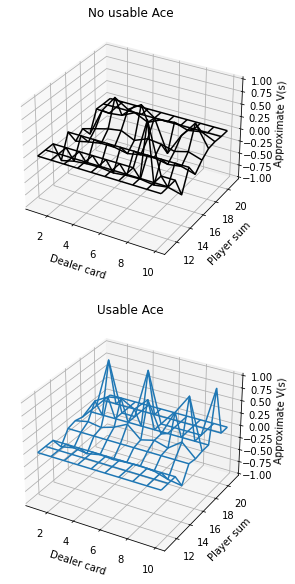

In [9]:
# No. of episodes 10,000
neps = 10000
for episode in range(neps):
    mc_blackjack()
    
#Convert into suitable array
# For reproducing output results
val_list = list(Value.values())
svals = np.array(val_list)
p_sum = np.arange(11,22)
d_card = np.arange(1, 11)
s_value = np.zeros((2,len(p_sum), len(d_card)))
for i in state_ep:
    ace_i = State[i][0]
    psum_i = State[i][1]
    dcard_i = State[i][2]
    s_value[ace_i][psum_i-11][dcard_i-1] = Value[i]

#fig, axes = plt.subplots(nrows=2, figsize=(10, 10), subplot_kw={'projection': '3d'})

fig, axes = plt.subplots(nrows=2, figsize=(10, 10), subplot_kw={'projection': '3d'})
p_sum = np.arange(11,22)
d_card = np.arange(1, 11)
X, Y = np.meshgrid(d_card,p_sum)

# Z = np.exp(X-Y)
# axes[0].plot_wireframe(X, Y,np.exp(X/Y))
# axes[1].plot_wireframe(X, Y, Z)

axes[0].plot_wireframe(X, Y, s_value[0,:, :],color = 'black')
axes[1].plot_wireframe(X, Y, s_value[1,:, :])

axes[0].set_title('No usable Ace')
axes[1].set_title('Usable Ace')
axes[0].set_zlim(-1,1)
axes[1].set_zlim(-1,1)
axes[0].set_xlabel('Dealer card')
axes[0].set_ylabel('Player sum')
axes[0].set_zlabel('Approximate V(s)')
axes[1].set_xlabel('Dealer card')
axes[1].set_ylabel('Player sum')
axes[1].set_zlabel('Approximate V(s)')
plt.show()

###### After 500,000 episodes

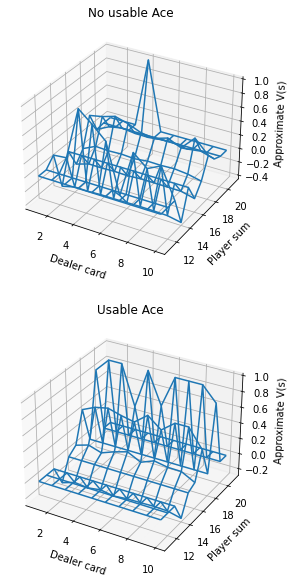

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# No. of episodes 500,000
neps = 500000
for episode in range(neps):
    mc_blackjack()

val_list = list(Value.values())
svals = np.array(val_list)
p_sum = np.arange(11,22)
d_card = np.arange(1, 11)
s_value = np.zeros((2,len(p_sum), len(d_card)))
for i in state_ep:
    ace_i = State[i][0]
    psum_i = State[i][1]
    dcard_i = State[i][2]
    s_value[ace_i][psum_i-11][dcard_i-1] = Value[i]

fig, axes = plt.subplots(nrows=2, figsize=(10, 10), subplot_kw={'projection': '3d'})
p_sum = np.arange(11,22)
d_card = np.arange(1, 11)
X, Y = np.meshgrid(d_card,p_sum)

axes[0].plot_wireframe(X, Y, s_value[0,:, :])
axes[1].plot_wireframe(X, Y, s_value[1,:, :])

axes[0].set_title('No usable Ace')
axes[1].set_title('Usable Ace')
axes[0].set_xlabel('Dealer card')
axes[0].set_ylabel('Player sum')
axes[0].set_zlabel('Approximate V(s)')
axes[1].set_xlabel('Dealer card')
axes[1].set_ylabel('Player sum')
axes[1].set_zlabel('Approximate V(s)')
plt.show()

# TD

###### Question 5. Solve exercise 6:2.

Example of TD better than MC update.
Considering the example mentioned having past experience of driving home to work scenario. To learn predictions for starting from the new building out expected estimates utilizing TD will be much better compared to MC because TD will give us estimates for the learning from partial experience of reaching from new home to highway whereas the MC will have to go till the end of the terminal state of work to give the average improved values at the end utilizing complete experience. States from the entry point of highways are not changed, so TD will be much better to get estimated improvements at every state state transitions from home to the entry point of highway for past home and current home. Utilizing the RMS error for both cases we can compare the TD updates to MC updates, definitely TD will be much better in the initial cases. So initially in this case TD updates will be better than MC.

###### Question 6. Write the necessary code and generate the figures in Example 6:2. Answer the related questions asked in exercises 6:3, 6:4, and 6:5.

###### Random walk

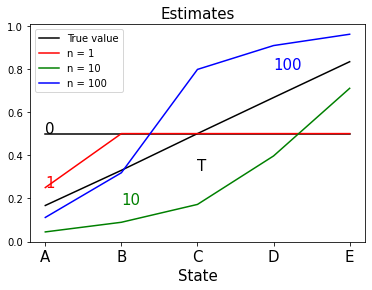

In [15]:
#Random walk simulation code with TD

import numpy as np
import matplotlib.pyplot as plt

# Parameters
Y = 1 # discount factor
a = 0.5 # Step size parameer
Vt = [0.167,0.33,0.5,0.667,0.833] #Target values
St = ['TL','A','B','C','D','E','TR'] # states
Act = ['left','right'] # Actions
#Initialize V(s) for all s E S+, except V(T)=0
Vs = [0,0.5,0.5,0.5,0.5,0.5,0] # Initial values

def random_walk(num,a):

    State = dict(zip(St,np.arange(7)))
    V = dict(zip(St,Vs))
    V_MC = dict(zip(St,Vs))
    #No. of episodes 
    N = num

    #Loop for each  episode
    for ep in range(N):
        # Initialize S
        S = 'C'
        # Loop for each step of episode
        while (1):
            # A <-- action given by pi for S
            action = np.random.choice(Act)
            if(action =='left'):
                if(State[S]-1>0):
                    Sd = St[State[S]-1]
                    R = 0
                else:
                    R = 0
                    Sd = 'TL'
            else:
                if(State[S]+1<6):
                    Sd = St[State[S]+1]
                    R = 0
                else:
                    R = 1
                    Sd = 'TR'

            V[S] = V[S] + a*(R + Y*V[Sd] - V[S])
            # S <-- S'
            S = Sd

            # until S is not terminal
            if(S=='TL' or S=='TR'):
                break
        #V_MC[S] = V_MC[S] + a*(R - V_MC[S])
    return V

#Plots                
V1 = random_walk(1,a)
V2 = random_walk(10,a)
V3 = random_walk(100,a)
# Plot values
ev1 = list(V1.values())
ev2 = list(V2.values())
ev3 = list(V3.values())
plt.xticks(range(len(St[1:6])),['A','B','C','D','E'],fontsize = 15)
plt.plot(Vt,color = 'black',label = 'True value')
plt.text(2,Vt[1],'T',fontsize = 15,color = 'black')
plt.plot(Vs[1:6],color = 'black')
plt.text(0,Vs[1],'0',fontsize = 15,color = 'black')
plt.plot(ev1[1:6],color = 'r',label='n = 1')
plt.text(0,ev1[1],'1',fontsize = 15,color = 'r')
plt.plot(ev2[1:6],color = 'g',label='n = 10')
plt.text(1,ev2[3],'10',fontsize = 15,color = 'g')
plt.plot(ev3[1:6],color = 'b',label='n = 100')
plt.text(3,ev3[3],'100',fontsize = 15,color = 'b')
plt.legend(loc = 'upper left')
plt.xlabel('State',fontsize = 15)
plt.title('Estimates',fontsize = 15)
plt.show()

###### Random walk RMS Error

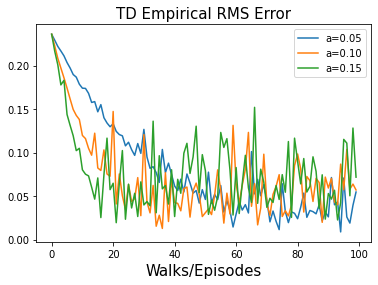

In [16]:
vt = np.array([0.167,0.33,0.5,0.667,0.833]) # Values functions
ve = np.array([0.5,0.5,0.5,0.5,0.5])
Episodes = 100

alpha = [0.05,0.1,0.15]
for a in alpha:
    RMS = []
    for i in range(Episodes):
        ev = random_walk(i,a)
        el = list(ev.values())
        v_est = np.array(el[1:6])
        rms = np.sqrt( np.mean(np.square(vt-v_est)))
        RMS.append(rms)
    plt.plot(RMS,label = 'a=%.2f'%a)

plt.xlabel('Walks/Episodes',fontsize = 15)
plt.title('TD Empirical RMS Error',fontsize = 15)
plt.legend(loc='upper right')
plt.show()

###### Exercise 6.3

Because after the end of 1st episode, TD ony updated the previous non terminal state at time t that was state A in this case and at time t+1 which was terminal state TL on the left, as reward is zero for transition between states. In the first episode only one state that is state A before left terminal is updated. It was changes by 0.25.
Explaination below.

* So according to TD update rule,
* V[S] = V[S] + a*(R + Y*V[Sd] - V[S])
* In Episode 1:
* current state S <-- A and next state was Sd <-- TL
* R = 0 for terminating on the left terminal state
* V[A] = 0.5, V[TL] = 0 , a = 0.5, Y = 1

* V[A] = V[A] + a*(R + Y*V[TL] - V[A])
* V[A] = 0.5 + 0.5 * (0 + 1*0 - 0.5)
* V[A] = 0.5 + 0.5*(-0.5)
* V[A] = 0.5 - 0.25
* V[A] = 0.25

###### Exercise 6.4

The contribution of TD error update at each step depends on the step size alpha parameter only for the convergence of TD or in the case of MC. Smaller alpha is important during asymtotic case and the error will reduce to smaller values over time.  So when the alpha parameters currently varied from 0.01 t0 0.15 when varied for a wider range will impact the convergence rate initially but later for asymptotic convergence of estimated values to the target truth values significantly will not. Not necessarily that both will performs good for a fixed alpha.

###### Exercise 6.5

When the TD values estimates were converging to the true values, the TD RMS error was decreasing slowly in the initial episodes to target values and then after it has converged, the variance due the rewards at the terminal states and TD error update because of higher alpha shows this behavior. Alpha is larger in the initial time and with time it reduces to a much smaller value. Larger value of alpha caused this behavior.
For higher alpha the estimates overshoots the target values so they again starts increasing and the behavior is observed.

###### Question 7. Write the code and generate the figure that compares the sum of rewards during episodes when using Q-learning and SARSA.

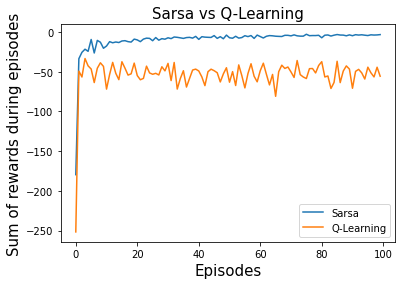

In [20]:
# Cliff Walking
import numpy as np
import matplotlib.pyplot as plt
#Parameters
WH = 4
WW = 12
#A = ['up' ,'down','left','right'] #Actions
up = 0
down = 1
left = 2
right = 3
A = [up,down,left,right]
alpha = 0.1 # Step size parameter
e = 0.01 # Epsilon

START = [3,0]
END = [3,11]

def move(action,curr_state):
    ix,iy = curr_state
    if(action== up and ix>0):
        nxt_state = [ix-1,iy]
    elif(action == down and ix < 3):
        nxt_state = [ix+1,iy]
    elif(action== left and iy>0):
        nxt_state = [ix,iy-1]
    elif(action == right and iy<11):
        nxt_state = [ix,iy+1]
    else:
        nxt_state = [ix,iy]
    R = -1
    
    #Making transition to cliff    
    if( action==down and ix==2 and 1<=iy<=10)or(action ==right and curr_state==START):
            #Send agent back to start
            R = -100
            #print(R)
            nxt_state = START
    return nxt_state, R

def greedy_action(state,q_val):
    #choose non greedy action with prob e
    if np.random.binomial(1,e)==1:
        return np.random.choice(A)
    #chooce greedy action
    else:
        values_ = q_val[state[0],state[1],:]
    return np.random.choice([action_ for action_,value_ in enumerate(values_) if value_ == np.max(values_)])
    
def Sarsa(q_val,a = alpha):
    state = START
    action = greedy_action(state,q_val)
    #print('action',action,'State',state)
    Reward = 0.0
    #Until state is terminal
    while (state !=END):
        nxt_state, R = move(action,state)
        nxt_action = greedy_action(nxt_state,q_val)
        #print('Nxt_action',nxt_action,'Nxt_state',nxt_state)

        Reward += R
        #print(Reward)
        # Calculate for regular sarsa
        target = 0.0
        nxt_q = q_val[nxt_state[0],nxt_state[1],:]
        best_action = np.argwhere(nxt_q == np.max(nxt_q))
        for act_ in A:
            if act_ in best_action:
                target += ((1.0 - e)/ len(best_action) + e/len(A))*q_val[nxt_state[0],nxt_state[1],act_]
            else:
                target += e/len(A) * q_val[nxt_state[0],nxt_state[1],act_]
        q_val[state[0],state[1],action] += a * (R + target - q_val[state[0],state[1],action])
        # S <-- S'  A <--A'
        state = nxt_state
        action = nxt_action
    return Reward
    
    
def Qlearning(q_val,a = alpha):
    # Initialize S
    state = START
    Reward = 0.0
    # Until S is Terminal
    while state != END:
        action = greedy_action(state,q_val)
        nxt_state, R = move(action,state)
        Reward +=R
        # Q(S,A) <-- Q(S,A) + a*[R + Y* max_Q(S', a) − Q(S,A)]
        q_val[state[0],state[1],action ] += a * (R + np.max(q_val[state[0],state[1],:]) 
        - q_val[state[0],state[1],action])
        # S <-- S'
        state = nxt_state    
    return Reward

def sarsa_vs_Q():
    runs = 5
    Ep = 100 #Episodes 500
    sarsa_rewards = np.zeros(Ep)
    qlearning_rewards = np.zeros(Ep)
    for i in range(runs):
        Q_sarsa = np.zeros((4,12,4))
        Q_qlearning = np.copy(Q_sarsa)
        #Loop for each episode
        for ep in range(0,Ep):    
            sarsa_rewards[ep] += Sarsa(Q_sarsa)
            qlearning_rewards[ep] += Qlearning(Q_qlearning)
    #average values over run
    sarsa_rewards /=runs
    qlearning_rewards /=runs
    plt.plot(sarsa_rewards/10, label = 'Sarsa')
    plt.plot(qlearning_rewards/10,label = 'Q-Learning')
    plt.xlabel('Episodes',fontsize = 15)
    plt.ylabel('Sum of rewards during episodes',fontsize = 15)
    plt.title('Sarsa vs Q-Learning',fontsize = 15)
    plt.legend()
    plt.show()
    
sarsa_vs_Q()

###### Question 8. Solve Exercise 6:12.

No, they will be appear exactly the same but they are different in terms of greedy action selection. 
No, consider a case in which sarsa whose action selection depends on the next state S' and action A' , and if some come both the current state and next state becomes, then sarsa will take the past greedy choice made and make a transition to next state.
In Q learning, the updated q value based on the next state is used to make the choice of action selection which maximizes Q, therefore the greedy action is relected based on the updated Q to approach optimal.